Found 743 images belonging to 6 classes.
Found 184 images belonging to 6 classes.
Epoch 1/20
12/12 [==============================] - 57s 4s/step - loss: 2.3594 - accuracy: 0.2059 - val_loss: 1.6771 - val_accuracy: 0.2717
Epoch 2/20
12/12 [==============================] - 53s 4s/step - loss: 1.5876 - accuracy: 0.3365 - val_loss: 1.5330 - val_accuracy: 0.3641
Epoch 3/20
12/12 [==============================] - 54s 4s/step - loss: 1.4935 - accuracy: 0.3634 - val_loss: 1.4175 - val_accuracy: 0.4185
Epoch 4/20
12/12 [==============================] - 53s 5s/step - loss: 1.4266 - accuracy: 0.4186 - val_loss: 1.3804 - val_accuracy: 0.4891
Epoch 5/20
12/12 [==============================] - 50s 4s/step - loss: 1.3121 - accuracy: 0.4832 - val_loss: 1.2846 - val_accuracy: 0.5163
Epoch 6/20
12/12 [==============================] - 52s 5s/step - loss: 1.1910 - accuracy: 0.5249 - val_loss: 1.2313 - val_accuracy: 0.5924
Epoch 7/20
12/12 [==============================] - 51s 4s/step - loss: 1.1537

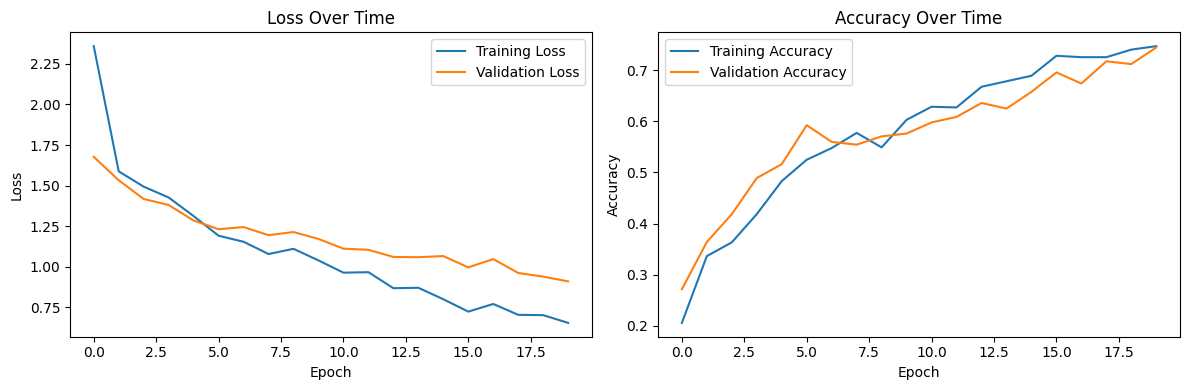

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Define the paths to your training and testing directories
train_dir = 'C:/Users/USER/Downloads/dataset/dataset/train'
test_dir = 'C:/Users/USER/Downloads/dataset/dataset/test'

# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    validation_split=0.2
)

train_data_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

valid_data_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

# Build a more complex model with regularization and dropout
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(len(train_data_gen.class_indices), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 20  # Increased number of epochs
history = model.fit(train_data_gen, validation_data=valid_data_gen, epochs=epochs)

# Save the trained model to a file
model.save('flower_classification_model.h5')

# Plot loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Time')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 132ms/step


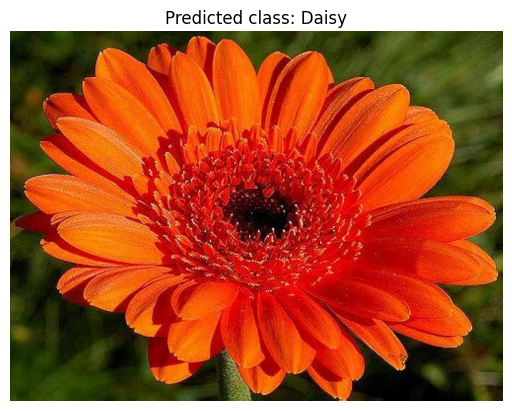

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('flower_classification_model.h5')

# Load and preprocess the new image
image_path = 'C:/Users/USER/Downloads/dataset/dataset/new/ds_2.jpg'  # Replace with the path to your new image
image = load_img(image_path, target_size=(150, 150))
image = img_to_array(image)
image = image / 255.0  # Normalize pixel values to [0, 1]
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Use the model for predictions
predictions = model.predict(image)

# Interpret the predictions
class_indices = train_data_gen.class_indices  # Get the mapping of class indices to class labels
predicted_class_index = np.argmax(predictions)
predicted_class_label = [k for k, v in class_indices.items() if v == predicted_class_index][0]

# Display the image and predicted class
plt.imshow(load_img(image_path))
plt.title(f"Predicted class: {predicted_class_label}")
plt.axis('off')  # Hide axis labels
plt.show()
